In [1]:
# import fundamental libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load dataset
ds = pd.read_csv('50_Startups.csv')
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# split independent, dependent variables, iloc required for ds instance
x, y = ds.iloc[:, :-1], ds.iloc[:, -1]  
x[:2]

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [4]:
y[:2]

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [5]:
# values returns np.array(list(list))
x, y = x.values, y.values

In [6]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
onehotencoder = OneHotEncoder(categorical_features=[3])
x = onehotencoder.fit_transform(x).toarray()

/home/angelos/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/angelos/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [7]:
x[:5]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

In [8]:
# when dealing with categorical variables and attempting to use multiple regression you must remove one of them
x = x[:, 1:]
pd.DataFrame(x[:5]).head() # pass x to DataFrame to watch it prettier

,0,1,2,3,4
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [9]:
# split train, test 
from sklearn.model_selection import train_test_split

# random_state stands for the seed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
print(y_train, y_test)

[ 96778.92  96479.51 105733.54  96712.8  124266.9  155752.6  132602.65
  64926.08  35673.41 101004.64 129917.04  99937.59  97427.84 126992.93
  71498.49 118474.03  69758.98 152211.77 134307.35 107404.34 156991.12
 125370.37  78239.91  14681.4  191792.06 141585.52  89949.14 108552.04
 156122.51 108733.99  90708.19 111313.02 122776.86 149759.96  81005.76
  49490.75 182901.99 192261.83  42559.73  65200.33] [103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [10]:
# fit the multiple regression linear model with the training set
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

# prediction of the result from the given training set
y_pred = regression.predict(x_test)

In [11]:
print(y_test)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [12]:
print(y_pred)

[103015.20159796 132582.27760815 132447.73845175  71976.09851258
 178537.48221056 116161.24230166  67851.69209676  98791.73374687
 113969.43533013 167921.06569551]


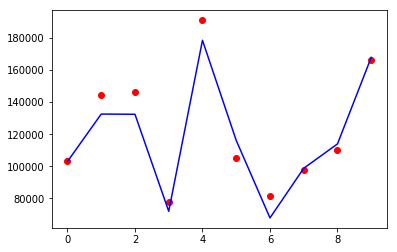

In [13]:

a = range(len(x_test))
plt.scatter(a, y_test, color='red')
plt.plot(a, y_pred, color='blue')
plt.show()

In [14]:
def print_floats(src):
    print([ f'{x:.3f}' for x in regression_OLS.pvalues ])  

In [15]:
# Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás
import statsmodels.formula.api as sm

SL = 0.05

x = np.append(arr=np.ones((50, 1)).astype(int), values=x, axis=1)
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog=y, exog=x_opt).fit()
# regression_OLS.summary()

In [16]:
print_floats(regression_OLS.pvalues)

['0.000', '0.953', '0.990', '0.000', '0.608', '0.123']


In [17]:
import math

def max_value_enum(vec):
    maxval = -math.inf
    maxpos = 0
    for i, v in enumerate(vec):
        if v > maxval: maxpos, maxval = i, v
    return maxpos, maxval

In [18]:
import ipdb

In [40]:
import statsmodels.formula.api as sm

def back_elimination(x, y, sl=0.05):
    '''
    It is assumed that x[:, 0] are all ones
    '''
    x_opt = x[:]
    indexes = [ i for i in range(len(x[0])) ]
    # ipdb.set_trace() # debugging starts here
    for i in range(len(x[0])):
        regression_OLS = sm.OLS(endog=y, exog=x_opt).fit()
        pvals = regression_OLS.pvalues
        maxpos, maxval = max_value_enum(pvals)
        if maxval <= sl: break
        indexes.pop(maxpos) # pop method removes and returns a value given an index 
        x_opt = x[:, indexes]
    return indexes, x_opt

In [44]:
removed_indexes, x_opt = back_elimination(x, y)
print(removed_indexes)

[0, 1, 2, 3, 4, 5]
2 0.9897941241607061
[0, 1, 3, 4, 5]
1 0.9398329772576751
[0, 3, 4, 5]
2 0.6017551078497458
[0, 3, 5]
2 0.06003039719113059
[0, 3]
[0, 3]


In [49]:
pd.DataFrame(x_opt).head()

,0,1
0,1.0,165349.20
1,1.0,162597.70
2,1.0,153441.51
3,1.0,144372.41
4,1.0,142107.34


In [ ]:
# random_state stands for the seed
x_train, x_test, y_train, y_test = train_test_split(x_opt, y, test_size=0.2, random_state=0) 

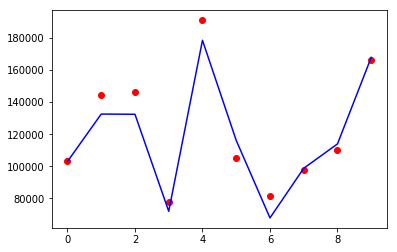

In [51]:

regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)

a = range(len(x_test))
plt.scatter(a, y_test, color='red')
plt.plot(a, y_pred, color='blue')
plt.show()